# ADS 509 Module 3: Group Comparison 
### Kevon Cambridge

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics and Twitter descriptions for the two artists you selected in Module 1. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [2]:
# Use this space for any additional import statements you need



In [7]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

#for country in emoji.is_emoji(): 
    #for em in emoji.is_emoji[country] : 
        #all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """

    # Place your Module 2 solution here
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    
    if num_tokens > 0:
        lexical_diversity = num_unique_tokens/num_tokens
    else:
        return 'num_tokens is 0'
    num_characters = len(''.join(tokens))
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print(Counter(tokens).most_common(5))
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])


    
def is_emoji(s):
    return(emoji.is_emoji(s))

def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # modify this function to remove stopwords
    output = [i for i in tokens if i not in sw]
    return(output)
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    # modify this function to return tokens
    return(text.split())

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [8]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer

data_location = "C:/Users/19545/ADS509 Text Mining/ADS-509-Module-3/" # change to your location if it is not in the same directory as your notebook
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [9]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"

In [10]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

In [13]:
#viewing twitter data
twitter_data.head()

,screen_name,name,id,location,followers_count,friends_count,description,artist
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher


In [12]:
# read in the lyrics here
path = data_location + lyrics_folder
artists = []
title = []
lyrics = []

lyrics_data = {}

for artist in os.listdir(path):
    artist_name = os.path.join(path, artist)
    for file in os.listdir(artist_name):
        filename = os.path.join(path, artist, file)
        with open(filename) as infile:
            songs = infile.readlines()
        artists.append(artist)
        title.append(songs[0])
        lyrics.append(''.join(songs))
        
        #f1 = open(filename, 'r')
        #songs = file.replace('.txt', '').split('\n')
        #print(songs[0])

lyrics_data = {'Name': artists, 'Title': title, 'Lyrics': lyrics}
#lyrics_data
df_lyrics = pd.DataFrame(lyrics_data)
df_lyrics

,Name,Title,Lyrics
0,cher,"""88 Degrees""\n","""88 Degrees""\n\n\n\nStuck in L.A., ain't got n..."
1,cher,"""A Different Kind Of Love Song""\n","""A Different Kind Of Love Song""\n\n\n\nWhat if..."
2,cher,"""After All""\n","""After All""\n\n\n\nWell, here we are again\nI ..."
3,cher,"""Again""\n","""Again""\n\n\n\nAgain evening finds me at your ..."
4,cher,"""Alfie""\n","""Alfie""\n\n\n\nWhat's it all about, Alfie?\nIs..."
...,...,...,...
415,robyn,"""We Dance To The Beat""\n","""We Dance To The Beat""\n\n\n\nWe dance to the ..."
416,robyn,"""Where Did Our Love Go""\n","""Where Did Our Love Go""\n\n\n\nThoughts about ..."
417,robyn,"""Who's That Girl""\n","""Who's That Girl""\n\n\n\nGood girls are pretty..."
418,robyn,"""With Every Heartbeat""\n","""With Every Heartbeat""\n\n\n\nMaybe we could m..."


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove punctuation
* Split on whitespace
* Remove stopwords (optional)

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove punctuation other than emojis or hashtags
* Split on whitespace
* Remove stopwords

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [16]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

df_lyrics["tokens"] = df_lyrics["Lyrics"].apply(prepare,pipeline=my_pipeline)
df_lyrics["num_tokens"] = df_lyrics["tokens"].map(len) 

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 


In [17]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [18]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
1091107,cher,Southern boy loving life in the PNW. Let’s all...,"[southern, boy, loving, life, pnw, let’s, get,..."
853086,cher,🌈 but i cant stop dating men,"[🌈, cant, stop, dating, men]"
875602,cher,▪️A Mom▪️I ❤️ Phatcat▪️Progressive▪️Critical T...,"[▪️a, mom▪️i, ❤️, phatcat▪️progressive▪️critic..."
2954795,cher,❤ Justin Bieber ❤,"[❤, justin, bieber, ❤]"
2409027,cher,❤️please follow @perfcal ily❤️,"[❤️please, follow, perfcal, ily❤️]"
615506,cher,Just your everyday Star Wars and comic book ge...,"[everyday, star, wars, comic, book, geek, love..."
3976716,cher,full time hater | critical thinker | 🏳️‍⚧️ | e...,"[full, time, hater, critical, thinker, 🏳️‍⚧️, ..."
3757783,cher,Im a youtube obbsessed band geek ☁️,"[im, youtube, obbsessed, band, geek, ☁️]"
9093,robyn,Twitter has suspended my account please help m...,"[twitter, suspended, account, please, help, co..."
2447672,cher,•Gemini ♊️• Taken by Michael Aldous 9/5/17•❤️,"[•gemini, ♊️•, taken, michael, aldous, 9517•❤️]"


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: To improve our tokenization, we could have use lemmatization to group words so they can be analzed as a single item. For example, the word "apples" could be lemmatized to "apple".

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [21]:
# your code here
#getting cher data into a list
cher_lyrics = []
cher_song = df_lyrics[df_lyrics['Name'] == 'cher']

for lyric in cher_song['tokens']:
    cher_lyrics.extend(lyric)
    
#getting robynkonichiwa data into a list
robynkonichiwa_lyrics = []
robynkonichiwa_song = df_lyrics[df_lyrics['Name'] == 'robyn']
    
for lyric in robynkonichiwa_song['tokens']:
    robynkonichiwa_lyrics.extend(lyric)
    
print('Descriptive Stats Cher')
descriptive_stats(cher_lyrics)

print('\n')

print('Descriptive Stats Robynkonichiwa')
descriptive_stats(robynkonichiwa_lyrics)

Descriptive Stats Cher
There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172696 characters in the data.
The lexical diversity is 0.103 in the data.
[('love', 1004), ('im', 513), ('know', 486), ('dont', 440), ('youre', 333)]


Descriptive Stats Robynkonichiwa
There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73988 characters in the data.
The lexical diversity is 0.142 in the data.
[('know', 308), ('dont', 301), ('im', 299), ('love', 275), ('got', 251)]


[15227, 2156, 0.14159059565245943, 73988]

Q: what observations do you make about these data? 

A: The observation I make is, Robyn has more lexical diversity than of cher this means that Robyn has more different words than cher eventhough cher have more tokens than of Robyn



## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.


## Do this instead
1. The count of the word in the document vs. the count of the word in all of the documents combined  (as described in my pseudocode to Christopher earlier this week)
2. The proportion of the word in the document vs. the proportion of the word in each of the other documents, where the proportion is the count of the word divided by the length of the document (as described in the assignment)
3. The proportion of the word in the document vs. the proportion of the word in all of the documents combined (a combination of the two other options)
4. Some other ratio of your design, along with a description of what the ratio is and why it works to find words that are uniquely related to a specific document

In [24]:
twitter_data.head()

,screen_name,name,id,location,followers_count,friends_count,description,artist,tokens,num_tokens,has_emoji
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher,[nan],1,False
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]",6,False
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]",3,True
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher,[csu],1,False
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher,"[writer, washinformer, spelmancollege, alumna,...",17,False


In [52]:
df_lyrics.tail()

,Name,Title,Lyrics,tokens,num_tokens
415,robyn,"""We Dance To The Beat""\n","""We Dance To The Beat""\n\n\n\nWe dance to the ...","[dance, beat, dance, beat, dance, beat, dance,...",222
416,robyn,"""Where Did Our Love Go""\n","""Where Did Our Love Go""\n\n\n\nThoughts about ...","[love, go, thoughts, thinkin, used, love, stro...",55
417,robyn,"""Who's That Girl""\n","""Who's That Girl""\n\n\n\nGood girls are pretty...","[whos, girl, good, girls, pretty, like, time, ...",170
418,robyn,"""With Every Heartbeat""\n","""With Every Heartbeat""\n\n\n\nMaybe we could m...","[every, heartbeat, maybe, could, make, right, ...",106
419,robyn,"""You've Got That Something""\n","""You've Got That Something""\n\n\n\nLook at me ...","[youve, got, something, look, im, givin, lovin...",81


In [62]:
# your code here
corpus = df_lyrics[df_lyrics['Name']=="cher"]["tokens"]

#count of word in document
def wordCount(tokens, n, top = 10):
    doc_count = {}
    for line in tokens:
        for word in line:
            if word in doc_count:
                doc_count[word] +=1
            else:
                doc_count[word] = 1
    doc_list = []
    for word, count in doc_count.items():
        if count >=n:
            doc_list.append([word, count])
    
    doc_list = sorted(doc_list, key = lambda i: i[1], reverse = True)
    #returning the top word counts
    return doc_list[:top]

ans = wordCount(corpus, n = 5, top = 10)
print("Cher Lyrics Word Count\n")
print(ans)

#ans = wordCount(corpus)

#count of word in all document

Cher Lyrics Word Count

[['love', 1004], ['im', 513], ['know', 486], ['dont', 440], ['youre', 333], ['time', 319], ['baby', 319], ['see', 308], ['oh', 306], ['one', 282]]


In [63]:
# your code here
corpus = df_lyrics[df_lyrics['Name']=="robyn"]["tokens"]

#count of word in document
def wordCount(tokens, n, top = 10):
    doc_count = {}
    for line in tokens:
        for word in line:
            if word in doc_count:
                doc_count[word] +=1
            else:
                doc_count[word] = 1
    doc_list = []
    for word, count in doc_count.items():
        if count >=n:
            doc_list.append([word, count])
    
    doc_list = sorted(doc_list, key = lambda i: i[1], reverse = True)
    #returning the top word counts
    return doc_list[:top]

ans = wordCount(corpus, n = 5, top = 10)
print("Robyn lyrics Word Count\n")
print(ans)

#ans = wordCount(corpus)

#count of word in all document

Robyn lyrics Word Count

[['know', 308], ['dont', 301], ['im', 299], ['love', 275], ['got', 251], ['like', 232], ['baby', 222], ['youre', 169], ['never', 155], ['dance', 150]]


In [64]:
# your code here
corpus = twitter_data[twitter_data['artist']=="cher"]["tokens"]

#count of word in document
def wordCount(tokens, n, top = 10):
    doc_count = {}
    for line in tokens:
        for word in line:
            if word in doc_count:
                doc_count[word] +=1
            else:
                doc_count[word] = 1
    doc_list = []
    for word, count in doc_count.items():
        if count >=n:
            doc_list.append([word, count])
    
    doc_list = sorted(doc_list, key = lambda i: i[1], reverse = True)
    #returning the top word counts
    return doc_list[:top]

ans = wordCount(corpus, n = 5, top = 10)
print("Cher Twitter Word Count\n")
print(ans)

#ans = wordCount(corpus)

#count of word in all document

Cher Twitter Word Count

[['nan', 1994031], ['love', 213522], ['im', 139051], ['life', 122679], ['music', 86733], ['de', 72970], ['follow', 62166], ['lover', 60191], ['like', 58566], ['mom', 53465]]


In [65]:
# your code here
corpus = twitter_data[twitter_data['artist']=="robyn"]["tokens"]

#count of word in document
def wordCount(tokens, n, top = 10):
    doc_count = {}
    for line in tokens:
        for word in line:
            if word in doc_count:
                doc_count[word] +=1
            else:
                doc_count[word] = 1
    doc_list = []
    for word, count in doc_count.items():
        if count >=n:
            doc_list.append([word, count])
    
    doc_list = sorted(doc_list, key = lambda i: i[1], reverse = True)
    #returning the top word counts
    return doc_list[:top]

ans = wordCount(corpus, n = 5, top = 10)
print("Robyn Twitter Word Count\n")
print(ans)

#ans = wordCount(corpus)

#count of word in all document

Robyn Twitter Word Count

[['nan', 168357], ['music', 14858], ['love', 11615], ['im', 9049], ['och', 7922], ['life', 7354], ['de', 6382], ['follow', 5570], ['like', 4944], ['en', 4833]]


Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: Interestingly, both artist say the word love a lot and also receive a lot of descriptions with the word love a lot. There is a lot of NAN values in both artist twitter data. There is a lot of posoitve words in both their lyrics and twitter data.

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [39]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

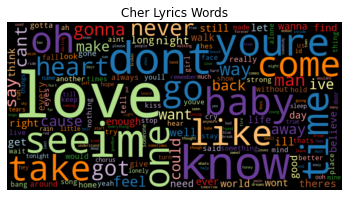

In [53]:
corpus_cher = df_lyrics[df_lyrics['Name']=="cher"]
word_count = count_words(corpus_cher)

cher_lyrics_cloud = wordcloud(word_count['freq'], title = 'Cher Lyrics Words')

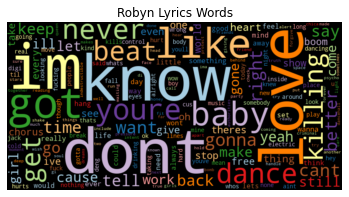

In [54]:
corpus_robyn = df_lyrics[df_lyrics['Name']=="robyn"]
word_count = count_words(corpus_robyn)

robyn_lyrics_cloud = wordcloud(word_count['freq'], title = 'Robyn Lyrics Words')

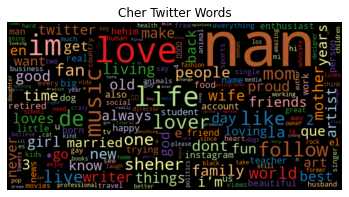

In [56]:
corpus_cher = twitter_data[twitter_data['artist']=="cher"]
word_count = count_words(corpus_cher)

cher_lyrics_cloud = wordcloud(word_count['freq'], title = 'Cher Twitter Words')

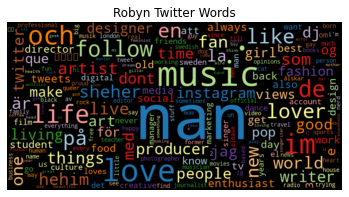

In [57]:
corpus_robyn = twitter_data[twitter_data['artist']=="robyn"]
word_count = count_words(corpus_robyn)

robyn_lyrics_cloud = wordcloud(word_count['freq'], title = 'Robyn Twitter Words')

Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: I see for the twitter data, we have a lot of NAN values for both artist. The word love seems to appear a lot for both artist as well.